# M5 Forecasting Challenge

Hey Guys!! This is my first Notebook I am submitting here on this platform. There may be many mistakes here but kindly bear with me. Any comments would be highly appreciated.
  In this notebook i have tried to give a visual overview of the data presented in the competition by means of various graphs in order to gain a better understanding of our objective in this competition.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_scaler = MinMaxScaler()
scaler = StandardScaler()
import warnings
warnings.filterwarnings("ignore")


In [3]:
INPUT_DIR = '../input/m5-forecasting-accuracy'
clndr = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
df = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')
submsn = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
prc = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')

### The Data

**calender.csv** - As rightly suggested by the name, this one contains the daily information about the dates on which the products were sold, like any the date, day of the week,month,year and information regarding any events that took place on particular dates. It also contains details about the snap benefits given on particular dates.
snap_CA means snap benefits for California, likewise for Texas and Wisconsin.
I got to know about snaps from this answer - https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/135883

It Contains data from Jan,2011 to June,2016, out of which last 28 days are the data for the validation period.
 

In [4]:
clndr.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
clndr['date'] = pd.to_datetime(clndr.date)
clndr['days'] = clndr['date'].dt.day

**sales_train_validation.csv** - This file contains data about each item such as category, department, item_id and sales data for each item - what quantity of the item was sold from which store and which date.

Initially on first look it seems quite complicated but a simple groupby operation can make the dateset a lot more easier to understand.

In [6]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
data = pd.DataFrame(df.groupby(by= ['cat_id','dept_id','item_id','store_id']).sum())

In [8]:
data.head()

d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  \
cat_id dept_id item_id     store_id                                           
FOODS  FOODS_1 FOODS_1_001 CA_1        3    0    0    1    4    2    0    2   
                           CA_2        2    0    0    0    1    0    8    0   
                           CA_3        1    2    1    1    1    2    0    1   
                           CA_4        0    1    1    1    1    1    0    0   
                           TX_1        0    1    1    0    0    0    0    0   

                                     d_9  d_10  ...  d_1904  d_1905  d_1906  \
cat_id dept_id item_id     store_id             ...                           
FOODS  FOODS_1 FOODS_1_001 CA_1        0     0  ...       0       2       0   
                           CA_2        4     1  ...       1       0      14   
                           CA_3        1     1  ...       0       0      13   
                           CA_4        0     0  ...       0       0       0   
                           TX_1        2     1  ...       0       0       0   

                                     d_1907  d_1908  d_1909  d_1910  d_1911  \
cat_id dept_id item_id     store_id                                           
FOODS  FOODS_1 FOODS_1_001 CA_1           4       1       1       0       1   
                           CA_2           0       1       1       4       0   
                           CA_3           0       0       0       0       0   
                           CA_4           2       0       0       0       1   
                           TX_1           0       0       0       0       0   

                                     d_1912  d_1913  
cat_id dept_id item_id     store_id                  
FOODS  FOODS_1 FOODS_1_001 CA_1           1       0  
                           CA_2           0       4  
                           CA_3           1       0  
                           CA_4           1       1  
                           TX_1           0       0  

[5 rows x 1913 columns]

In [9]:
# Total sale of each item from various stores.

sales = pd.DataFrame(data.sum(axis = 1))
sales.rename(columns = {0:'sales'},inplace=True)

In [10]:
sales

sales
cat_id    dept_id     item_id         store_id       
FOODS     FOODS_1     FOODS_1_001     CA_1       1503
                                      CA_2       2214
                                      CA_3       2302
                                      CA_4        688
                                      TX_1       1119
...                                               ...
HOUSEHOLD HOUSEHOLD_2 HOUSEHOLD_2_516 TX_2        481
                                      TX_3        234
                                      WI_1        166
                                      WI_2         62
                                      WI_3        245

[30490 rows x 1 columns]

In [11]:
stores= pd.DataFrame(df.groupby(['store_id','cat_id']).sum())

In [12]:
# Sales of each item from each store.
# Represents same information as sales dataframe but this one will be easier to visualize.


store_sales = pd.DataFrame(stores.sum(axis = 1))
store_sales.rename(columns = {0:'sales'},inplace=True)

In [13]:
store_sales

sales
store_id cat_id            
CA_1     FOODS      5380828
         HOBBIES     876678
         HOUSEHOLD  1440710
CA_2     FOODS      3480259
         HOBBIES     637803
         HOUSEHOLD  1567413
CA_3     FOODS      7515790
         HOBBIES     960947
         HOUSEHOLD  2711443
CA_4     FOODS      2819425
         HOBBIES     564455
         HOUSEHOLD   719796
TX_1     FOODS      3778209
         HOBBIES     429084
         HOUSEHOLD  1387999
TX_2     FOODS      5015124
         HOBBIES     635997
         HOUSEHOLD  1563263
TX_3     FOODS      4163088
         HOBBIES     527258
         HOUSEHOLD  1398984
WI_1     FOODS      3438352
         HOBBIES     655696
         HOUSEHOLD  1055014
WI_2     FOODS      4768184
         HOBBIES     370214
         HOUSEHOLD  1405614
WI_3     FOODS      4730680
         HOBBIES     466668
         HOUSEHOLD  1230434

**sell_prices.csv** - This one contains data regarding variation of prices of each item in each store on a weekly basis. 

In [14]:
prc.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Text(0.5, 1.0, 'Comparing Sales from various Stores')

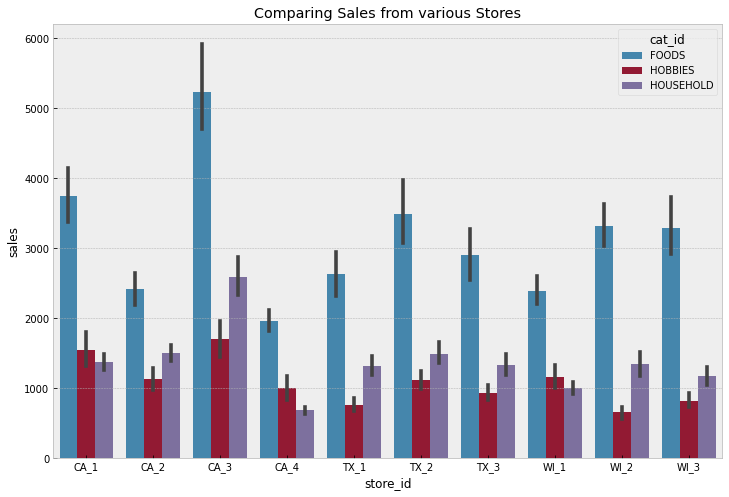

In [15]:
sale = sales.copy().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x= sale['store_id'],y=sale['sales'],hue=sale['cat_id'])
plt.title('Comparing Sales from various Stores')

This initial comparison clearly shows that the demand for food is highest for each store while there is a race going on between hobby and household items.

Now we will extract the daily sales data for each category from all the stores and merge them with the calender data so that we can start visualising it.

In [16]:
# Daily Sales data for each category

food = pd.DataFrame(data.xs('FOODS').sum(axis = 0))
hobbies = pd.DataFrame(data.xs('HOBBIES').sum(axis = 0))
house = pd.DataFrame(data.xs('HOUSEHOLD').sum(axis = 0))

In [17]:
# Merging it with the calender data

clndr = pd.merge(clndr,food,how = 'left',left_on=clndr['d'],right_on = food.index)
del clndr['key_0']
clndr.rename(columns = {0:'food'},inplace = True)
clndr = pd.merge(clndr,hobbies,how = 'left',left_on=clndr['d'],right_on = hobbies.index)
del clndr['key_0']
clndr.rename(columns = {0:'hobby'},inplace = True)
clndr = pd.merge(clndr,house,how = 'left',left_on=clndr['d'],right_on = house.index)
del clndr['key_0']
clndr.rename(columns = {0:'house'},inplace = True)

In [18]:
cln = clndr[0:1913]

In [19]:
cln.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,days,food,hobby,house
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,29,23178.0,3764.0,5689.0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,30,22758.0,3357.0,5634.0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,31,17174.0,2682.0,3927.0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,1,18878.0,2669.0,3865.0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,2,14603.0,1814.0,2729.0


In [20]:
# Taking daily Sales data for each each category from each store and merging with calender data.

l1 = ['FOODS','HOBBIES','HOUSEHOLD']
l2 = list(df['store_id'].unique())
for cat in l1:
    for store in l2:
        tmp = pd.DataFrame(data.xs(cat).xs(store,level = 2 ).sum(axis = 0))
        tmp.reset_index(inplace = True)
        tmp.rename(columns = {0:(cat+'_'+store).lower()},inplace = True)
        cln = pd.concat([cln,tmp[(cat+'_'+store).lower()]],axis = 1)
        

In [21]:
cln.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,household_ca_1,household_ca_2,household_ca_3,household_ca_4,household_tx_1,household_tx_2,household_tx_3,household_wi_1,household_wi_2,household_wi_3
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,542,763,743,244,524,679,503,508,451,732
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,...,520,728,862,272,520,708,502,424,362,736
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,...,393,464,646,189,338,420,370,262,319,526
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,...,401,434,744,199,367,415,320,179,385,421
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,...,330,368,692,176,263,345,201,0,150,204


Now since we have the daily sales data for each category from each store, we can start plotting them in order to gain some insights.

In [22]:
grps = cln.groupby(by=['year','month'])
def plot_trend(factor,subplots):
    if subplots == True:
        f, a = plt.subplots(3,2,figsize = (14,10))
        if type(factor) == list:
            for i,fact in enumerate(factor):
                check = grps.agg(fact=(fact,'sum'))
                check.rename(columns = {'fact':factor[i]},inplace=True)
                check.xs(2011).plot(ax=a[0,0])
                check.xs(2012).plot(ax=a[0,1])
                check.xs(2013).plot(ax=a[1,0])
                check.xs(2014).plot(ax=a[1,1])
                check.xs(2015).plot(ax=a[2,0])
                check.xs(2016).plot(ax=a[2,1])
                
        else:
            check = grps.agg({factor:'sum'})
            check.xs(2011).plot(ax=a[0,0])
            check.xs(2012).plot(ax=a[0,1])
            check.xs(2013).plot(ax=a[1,0])
            check.xs(2014).plot(ax=a[1,1])
            check.xs(2015).plot(ax=a[2,0])
            check.xs(2016).plot(ax=a[2,1])
        a[0,0].title.set_text('2011')
        a[0,1].title.set_text('2012')
        a[1,0].title.set_text('2013')
        a[1,1].title.set_text('2014')
        a[2,0].title.set_text('2015')
        a[2,1].title.set_text('2016')
        f.tight_layout()
        f.suptitle('Monthly Sales Trends')
    else:
        fig,ax = plt.subplots(figsize = (20,5))
        for fact in factor:
            cln.set_index('date')[fact].rolling(30).mean().plot(label = fact)
            plt.legend()
            fig.suptitle('30 Day Moving Average')
            

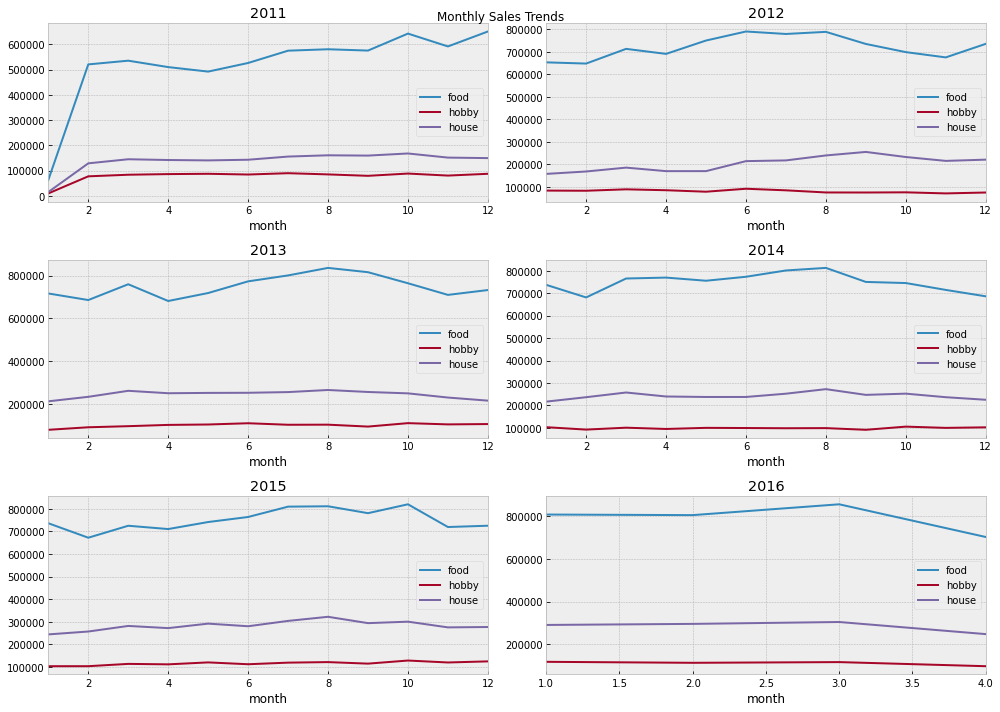

In [23]:
plot_trend(['food','hobby','house'],subplots = True)

The sales data for January 2011 is very low, but that is because the data available if only for last 3 days of January.
We can grab a sense of the monthly sales trends here. And we can play around here a little bit to comapre the sales trends for various stores and items.

Since the data is not scaled the trends for the other items are not very clear here. So we should also have a scaled version of the data in order to make the comparision easy.

In [24]:
cols = cln.iloc[:,15:].columns
scaled_df = pd.DataFrame(min_scaler.fit_transform( cln.iloc[:,15:]))
for i in range(0,len(cols)):
    scaled_df.rename(columns = {i:cols[i]},inplace = True)
cln_scaled = cln.iloc[:,:15]
cln_scaled = pd.concat([cln.iloc[:,:15],scaled_df],axis = 1)

In [25]:
new_grps = cln_scaled.groupby(by=['year','month'])
def plot_trend_scaled(factor,subplots):
    if subplots == True:
        f, a = plt.subplots(3,2,figsize = (14,10))
        if type(factor) == list:
            for i,fact in enumerate(factor):
                check = new_grps.agg(fact=(fact,'sum'))
                check.rename(columns = {'fact':factor[i]},inplace=True)
                check.xs(2011).plot(ax=a[0,0])
                check.xs(2012).plot(ax=a[0,1])
                check.xs(2013).plot(ax=a[1,0])
                check.xs(2014).plot(ax=a[1,1])
                check.xs(2015).plot(ax=a[2,0])
                check.xs(2016).plot(ax=a[2,1])
                
        else:
            check = new_grps.agg({factor:'sum'})
            check.xs(2011).plot(ax=a[0,0])
            check.xs(2012).plot(ax=a[0,1])
            check.xs(2013).plot(ax=a[1,0])
            check.xs(2014).plot(ax=a[1,1])
            check.xs(2015).plot(ax=a[2,0])
            check.xs(2016).plot(ax=a[2,1])
        a[0,0].title.set_text('2011')
        a[0,1].title.set_text('2012')
        a[1,0].title.set_text('2013')
        a[1,1].title.set_text('2014')
        a[2,0].title.set_text('2015')
        a[2,1].title.set_text('2016')
        f.tight_layout()
        f.suptitle('Monthly Sales Trends')
    else:
        fig,ax = plt.subplots(figsize = (20,5))
        for fact in factor:
            cln_scaled.set_index('date')[fact].rolling(30).mean().plot(label = fact)
            plt.legend()
            fig.suptitle('30 Day Moving Average')

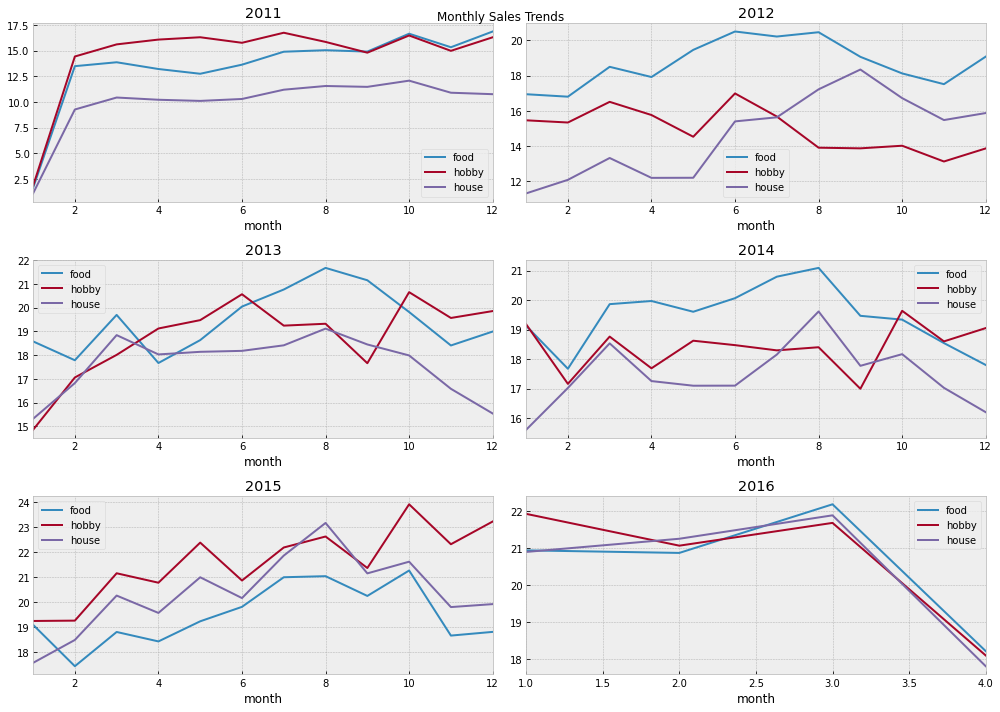

In [26]:
plot_trend_scaled(['food','hobby','house'],subplots = True)

Now we can see the actual trend of the data, but the scaled data won,t represent the actual sales numbers. We will have to choose between both the function according to our need.

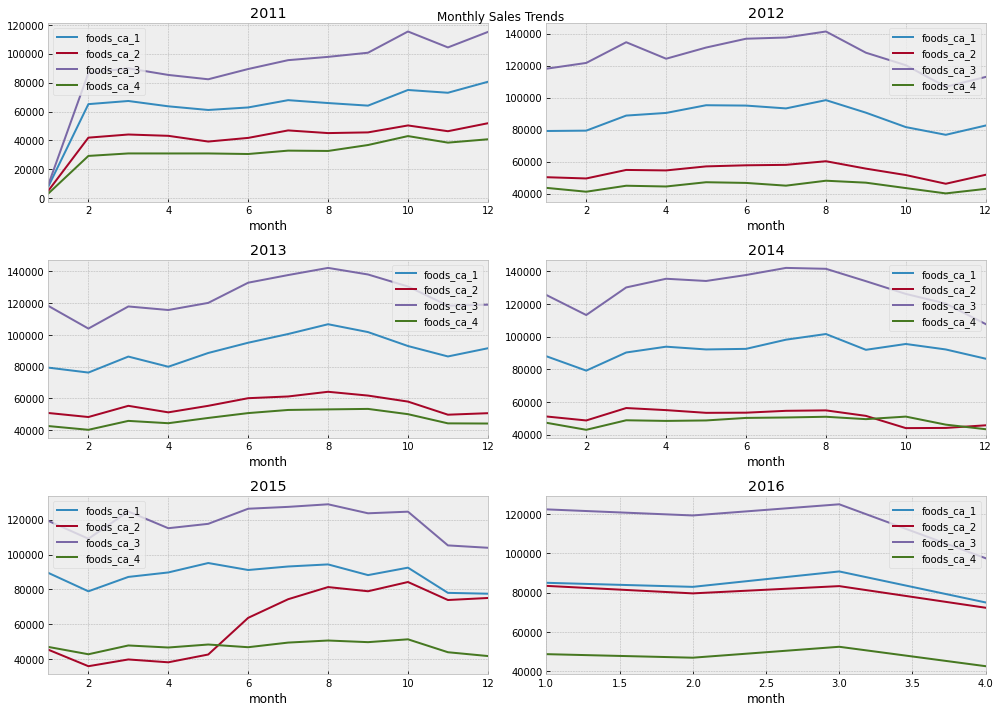

In [27]:
plot_trend(['foods_ca_1','foods_ca_2','foods_ca_3','foods_ca_4'],subplots = True)

The trend of food items from the stores is similar in most cases with a few exceptions as in 2015. 

They seem to rise around till the 8th month and then decrease upto the 12th.
Let's see if that is the case with other categories as well.

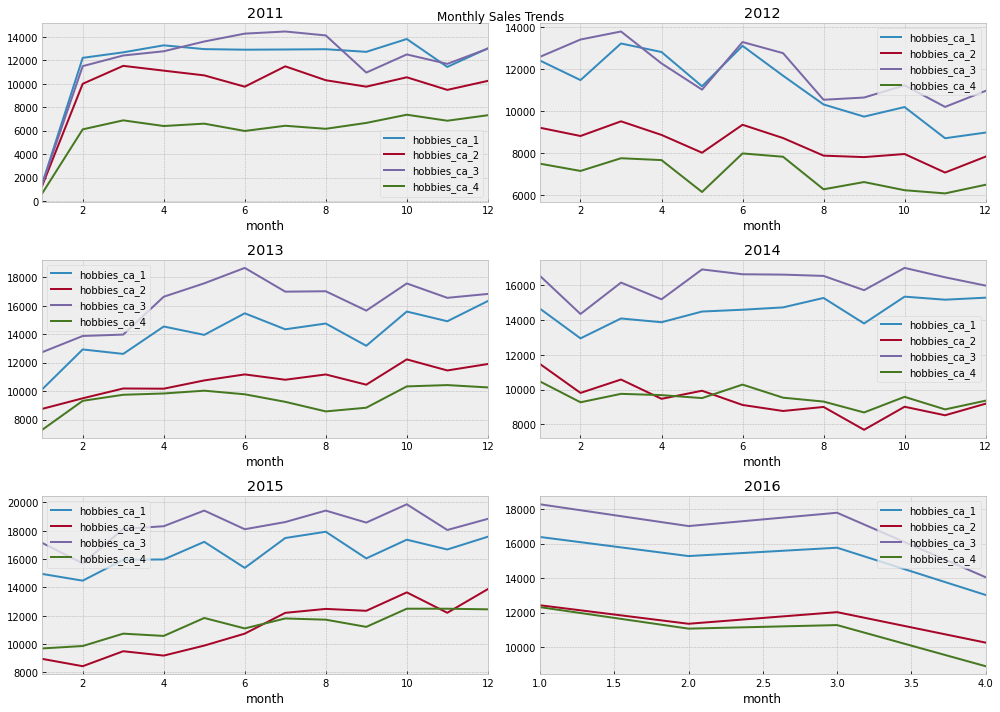

In [28]:
plot_trend(['hobbies_ca_1','hobbies_ca_2','hobbies_ca_3','hobbies_ca_4'],subplots = True)

Yeah! The trend lines seem fairly similar for this item also except for 2015.

Now let's take a look at the yearly trends.

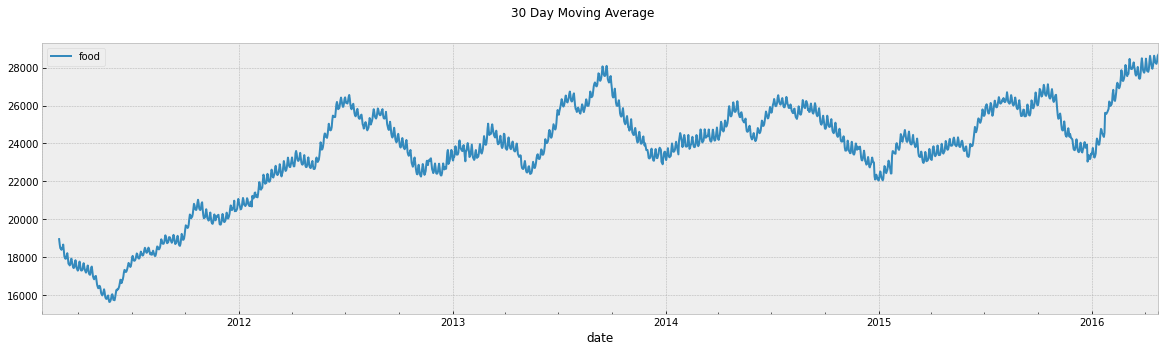

In [29]:
plot_trend(['food'],subplots = False)

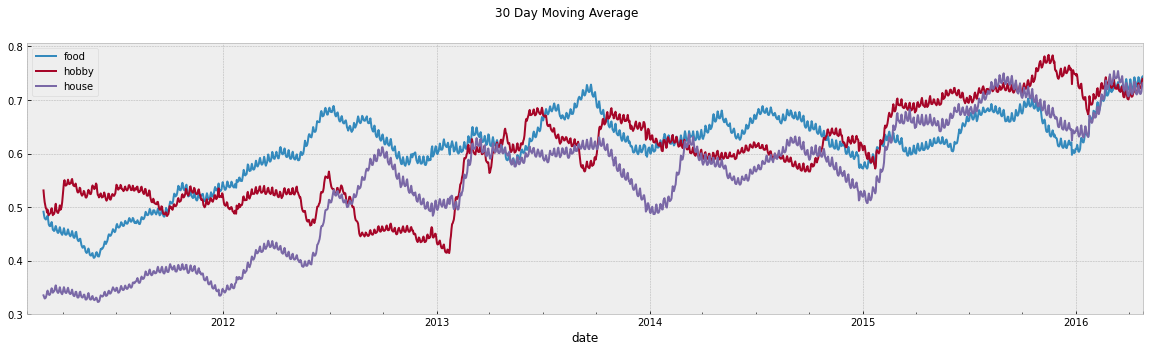

In [30]:
plot_trend_scaled(['food','hobby','house'],subplots = False)

Let's zoom in a little bit and look at the daily sales.

In [31]:
groups = cln.groupby(by=['year','month','date']).sum()
def monthly_sale(month,item,years):
    tmp = groups.xs(month,level=1)[item].unstack(level=0)
    tmp.reset_index(inplace=True)
    tmp['days'] = tmp['date'].dt.day
    fig,ax = plt.subplots(figsize = (12,8))
    for year in years:
        plt.plot(tmp['days'],tmp[year],axes = ax,label=year)
        plt.legend()
    

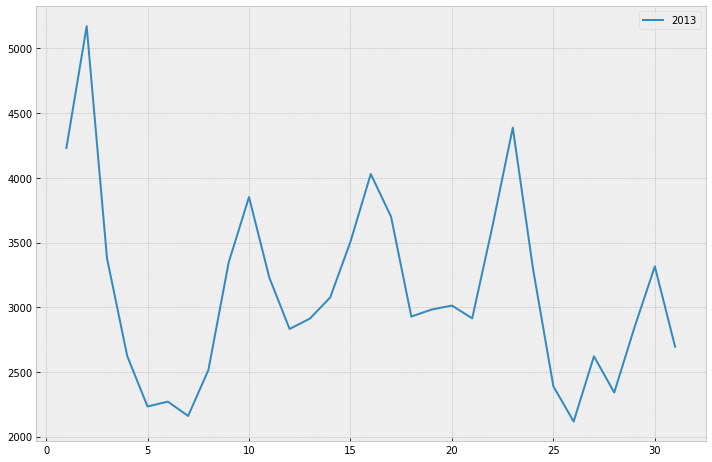

In [32]:
monthly_sale(3,'hobby',[2013])

Right now it does not seem to be very useful but this function can be used to compare the daily sales in a month in different years.

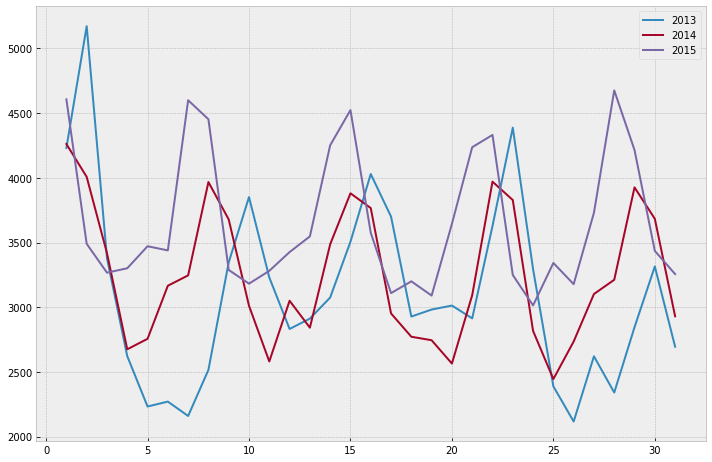

In [33]:
monthly_sale(3,'hobby',[2013,2014,2015])

Also we have the data for particular events on various days. So why not use that as well.

In [34]:
tmpdf = cln[~cln['event_name_1'].isnull()]
def monthly_sale_event(month,item,year):
    tmp = groups.xs(month,level=1)[item].unstack(level=0)
    tmp.reset_index(inplace=True)
    tmp['days'] = tmp['date'].dt.day
    fig,ax = plt.subplots(figsize = (12,8))
    tmpyr=tmpdf[tmpdf.year == year]
    l1=list(tmpyr[tmpyr.month==month]['days'])
    l2=list(tmpyr[tmpyr.month==month]['event_name_1'])
    print(l2)
    plt.plot(tmp['days'],tmp[year],axes = ax,label=year)
    plt.legend()
    axe = plt.gca()
    start,end = axe.get_ylim()[0],axe.get_ylim()[1]
    plt.vlines(l1,start,end,linestyles='--',color='r',alpha = 0.5)
    for i in range(0,len(l2)):
        plt.text(l1[i],end,l2[i])
    plt.show()

['Cinco De Mayo', "Mother's day", 'MemorialDay']


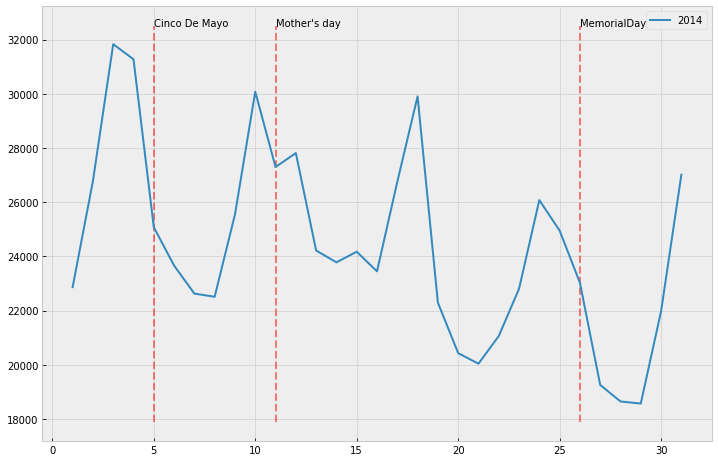

In [35]:
monthly_sale_event(5,'food',2014)

So we can see how the sales peak a few days before any event and dip for a few days after. The events data can be highly useful while building a model because it is able to explain a lot of variation in the data.

['Chanukah End', 'Christmas']


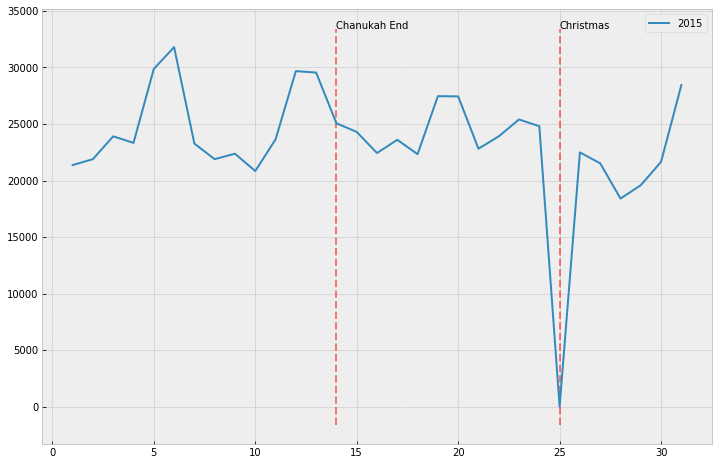

In [36]:
monthly_sale_event(12,'food',2015)

The sales remain relatively high during the month of december and dip to zero on the day of christmas which is very reasonable. 

In [37]:
def sale_trend(time,item,cal_type):
    if time == 'daily':
        cln.set_index('date')[item].plot(figsize = (15,5))
        cln.set_index('date')[item].rolling(30).mean().plot(figsize = (15,5))
    else:
        if type(item) == list:
            fig,ax = plt.subplots(figsize = (15,5))
            for prod in item:
                if cal_type == 'sum':
                    cln.groupby(time)[item].sum().plot(figsize=(15,5),axes = ax)
                elif cal_type == 'mean':
                    cln.groupby(time)[item].mean().plot(figsize=(15,5),axes = ax)
        else:
            if cal_type == 'sum':
                cln.groupby(time)[item].sum().plot(figsize=(15,5))
            elif cal_type == 'mean':
                cln.groupby(time)[item].mean().plot(figsize=(15,5))

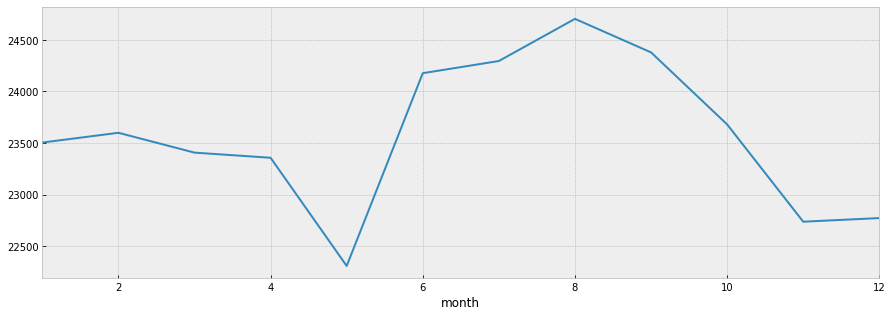

In [38]:
sale_trend('month','food','mean')

On an average the sales have been higher for the 8th month and low for the 5th month. 

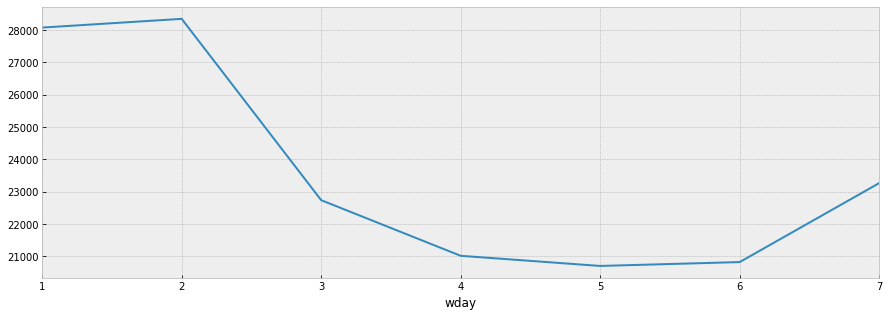

In [39]:
sale_trend('wday','food','mean')

1 is Saturday. This indicates that on an average the sales are more on weekends and very less on weekdays.


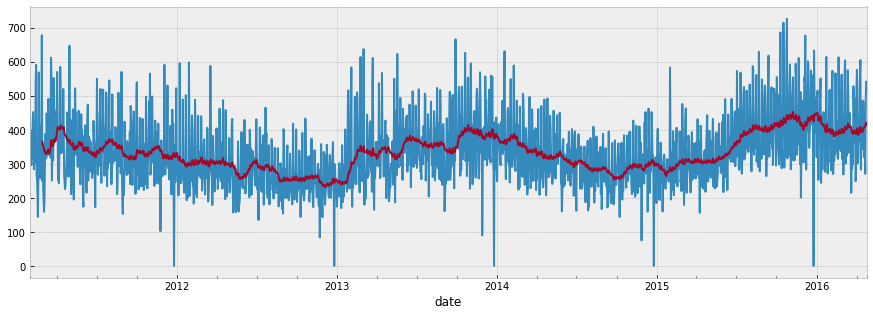

In [40]:
sale_trend('daily','hobbies_ca_2','sum')

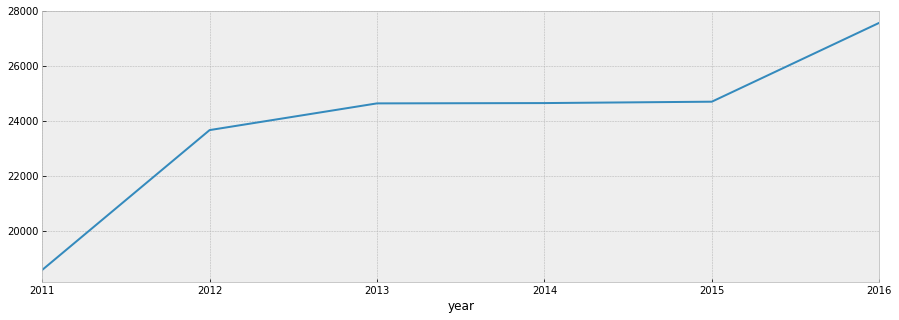

In [41]:
sale_trend('year','food','mean')

An overall rise in sales over the years.

Now let's manipulate the price data and see how prices affect the sales.

In [42]:
prc = pd.merge(prc,df[['id','item_id','cat_id']],how = 'left',on='item_id')

In [43]:
prc = prc.groupby(['cat_id','store_id','wm_yr_wk'])['sell_price'].mean()

In [44]:
prc = prc.unstack(level=1).reset_index()

Now the dataset shows the variation of prices of each category in each store.

In [45]:
prc

store_id,cat_id,wm_yr_wk,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
0,FOODS,11101,3.149220,2.876585,3.041969,2.953270,2.948958,2.956474,2.929892,2.759773,2.807157,2.987332
1,FOODS,11102,3.153394,2.878910,3.059110,3.050711,2.982808,2.987700,2.983471,2.803158,2.861576,3.023365
2,FOODS,11103,3.129630,2.868239,3.069272,3.058299,2.985073,2.987307,3.004687,2.831856,2.859043,3.057585
3,FOODS,11104,3.123212,2.860965,3.078915,3.064828,2.984580,2.991057,2.997962,2.822036,2.881156,3.057149
4,FOODS,11105,3.125868,2.854346,3.081788,3.070062,2.973670,2.984856,2.989463,2.820916,2.889262,3.041605
...,...,...,...,...,...,...,...,...,...,...,...,...
841,HOUSEHOLD,11617,5.474651,5.470831,5.470468,5.475616,5.462923,5.464021,5.463066,5.475616,5.469723,5.459102
842,HOUSEHOLD,11618,5.474651,5.469876,5.469513,5.474661,5.462598,5.462120,5.463066,5.476180,5.471939,5.464766
843,HOUSEHOLD,11619,5.474651,5.474651,5.471490,5.474651,5.463543,5.463543,5.463543,5.476180,5.471939,5.464957
844,HOUSEHOLD,11620,5.474651,5.474040,5.474651,5.474174,5.489580,5.459150,5.462130,5.475883,5.471939,5.470898


In [46]:
food_prc = prc[prc['cat_id']=='FOODS']
hobby_prc= prc[prc['cat_id']=='HOBBIES']
house_prc = prc[prc['cat_id']=='HOUSEHOLD']

In [47]:
food_cols = [c for c in cln.columns if 'food' in c]
hobby_cols = [c for c in cln.columns if 'hobb' in c]
house_cols = [c for c in cln.columns if 'house' in c]

In [48]:
food_prc = pd.merge(food_prc,cln.groupby('wm_yr_wk')[food_cols].mean(),how='left',on='wm_yr_wk')
food_prc.dropna(inplace=True)
hobby_prc = pd.merge(hobby_prc,cln.groupby('wm_yr_wk')[hobby_cols].mean(),how='left',on='wm_yr_wk')
hobby_prc.dropna(inplace=True)
house_prc = pd.merge(house_prc,cln.groupby('wm_yr_wk')[house_cols].mean(),how='left',on='wm_yr_wk')
house_prc.dropna(inplace=True)

In [49]:
food_scaled = pd.DataFrame(scaler.fit_transform(food_prc.iloc[:,2:]))
hobby_scaled = pd.DataFrame(scaler.fit_transform(hobby_prc.iloc[:,2:]))
house_scaled = pd.DataFrame(scaler.fit_transform(house_prc.iloc[:,2:]))

In [50]:
l = list(df['store_id'].unique())

for i in range(len(l)):
    food_scaled.rename(columns = {i:l[i]},inplace=True)
for i in range(0,len(food_cols)):
     food_scaled.rename(columns = {i+10:food_cols[i]},inplace=True)
        
for i in range(len(l)):
    hobby_scaled.rename(columns = {i:l[i]},inplace=True)
for i in range(0,len(hobby_cols)):
     hobby_scaled.rename(columns = {i+10:hobby_cols[i]},inplace=True)
        
for i in range(len(l)):
    house_scaled.rename(columns = {i:l[i]},inplace=True)
for i in range(0,len(house_cols)):
     house_scaled.rename(columns = {i+10:house_cols[i]},inplace=True)

In [51]:
def sales_vs_price(dataset,store_list,sale_list):
    fig,ax = plt.subplots(figsize=(15,5))
    for store in store_list:
        plt.plot(food_prc['wm_yr_wk'],dataset[store],label=store)
    for sales in sale_list:
        plt.plot(food_prc['wm_yr_wk'],dataset[sales].rolling(7).mean(),'--',label=sales)
    fig.legend()
    fig.suptitle('Comparing Price vs Sales')

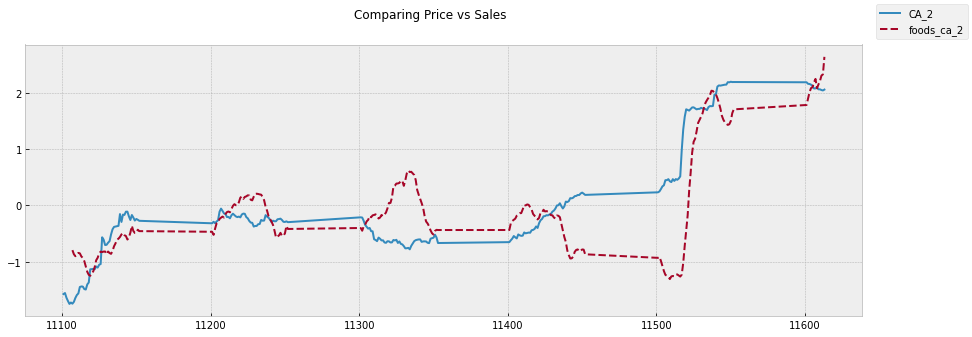

In [52]:
sales_vs_price(food_scaled,['CA_2'],['foods_ca_2'])

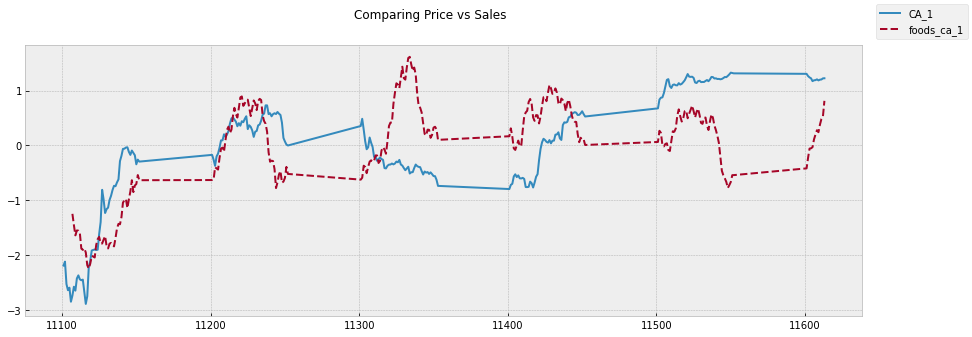

In [53]:
sales_vs_price(food_scaled,['CA_1'],['foods_ca_1'])

Though there is an inverse relation between the sales and prices it does not seem to be constant.

I think there might be an easier way to do this.

I recently came to know about this amazing function pd.resample() to analyse time series datasets. Let's try it out!!

In [54]:
cols = [i for i in df.columns if 'd_' in i ]

In [55]:
dates = cln['date']

In [56]:
def mapp(types,item,time = 'M',todo='plot'):
    if types == 'item':
        tmp = df.set_index('item_id').loc[item,cols].sum()
        tmp = tmp.reset_index().drop('index',axis = 1).rename(columns = {0:item})
        if todo == 'plot':
            pd.merge(dates,tmp,left_index = True,right_index=True).set_index('date').resample(time).mean().plot(figsize = (15,5))
        else:
            return pd.merge(dates,tmp,left_index = True,right_index=True).set_index('date').resample(time).mean()
    
    if types == 'category':
        tmp = df.set_index('cat_id').loc[item,cols].sum()
        tmp = tmp.reset_index().drop('index',axis = 1).rename(columns = {0:item})
        if todo == 'plot':
            pd.merge(dates,tmp,left_index = True,right_index=True).set_index('date').resample(time).mean().plot(figsize = (15,5))
        else:
            return pd.merge(dates,tmp,left_index = True,right_index=True).set_index('date').resample(time).mean()
    

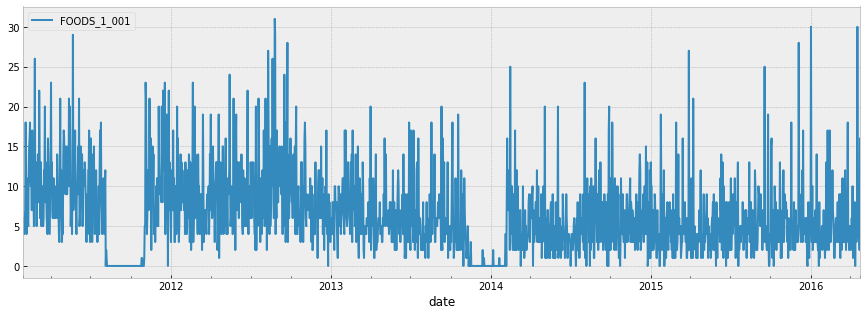

In [57]:
mapp('item','FOODS_1_001','D','plot')

That was easy, we can also plot monthly or yearly trends.

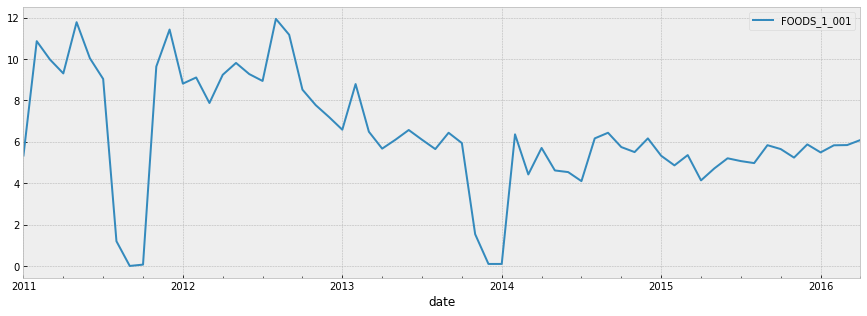

In [58]:
mapp('item','FOODS_1_001')

Enough visualization now. Let's confirm if our data has some trends or seasonality in it by using the statsmodel library of python. 

In [59]:
dframe = mapp('category','FOODS','M','df')

In [60]:
dframe

,FOODS
date,
2011-01-31,21036.666667
2011-02-28,18580.357143
2011-03-31,17255.290323
2011-04-30,16985.600000
2011-05-31,15863.000000
...,...
2015-12-31,23388.451613
2016-01-31,26046.451613
2016-02-29,27749.620690


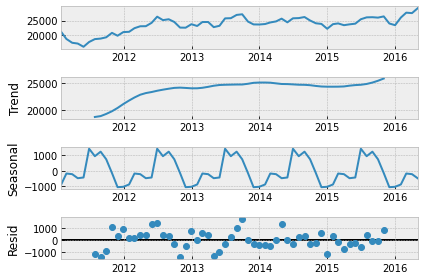

In [61]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(dframe).plot()
result = sm.tsa.stattools.adfuller(dframe)

As we can clearly see that the data has a regular seasonality. Probably should check it for other categories also.

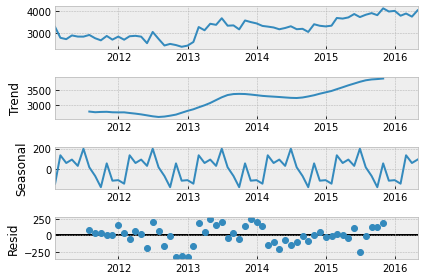

In [62]:
sm.tsa.seasonal_decompose(mapp('category','HOBBIES','M','df')).plot()
result = sm.tsa.stattools.adfuller(mapp('category','HOBBIES','M','df'))

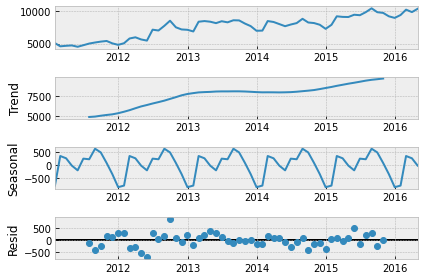

In [63]:
sm.tsa.seasonal_decompose(mapp('category','HOUSEHOLD','M','df')).plot()
result = sm.tsa.stattools.adfuller(mapp('category','HOUSEHOLD','M','df'))

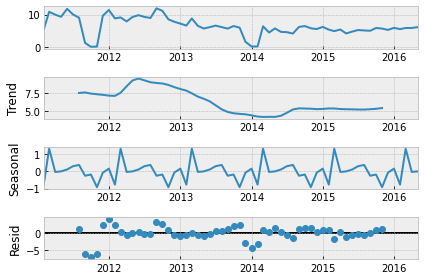

In [64]:
sm.tsa.seasonal_decompose(mapp('item','FOODS_1_001','M','df')).plot()
result = sm.tsa.stattools.adfuller(mapp('category','HOUSEHOLD','M','df'))

Now we can finally move towards building our model.

**Coming Soon!!!**